In [1]:
import os
import scipy.io
import numpy as np
import matplotlib.pylab as plt
from keras.utils import to_categorical

Using TensorFlow backend.


# Load data

In [15]:
def load_data(path):
    #load X
    X = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            img = cv2.imread(path + file, 0)
            X.append(img)
    X = np.array(X)
    X = np.extend_dims(X, axis=3)
    #load Y
    y = np.load_txt(path + 'Y.txt')

    return X,y

X_train,y_train = load_data('generated_dataset/train/')
X_test,y_test = load_data('generated_dataset/test/')
#X_extra,y_extra = load_data('cropped/extra_32x32.mat')

print('X_train:',X_train.shape,'y_train:',y_train.shape)
print('X_test:',X_test.shape,'y_test:',y_test.shape)
#print('X_extra:',X_extra.shape,'y_extra:',y_extra.shape)

X_train: (10442, 32, 32, 1) y_train: (10442, 2)
X_test: (3425, 32, 32, 1) y_test: (3425, 2)


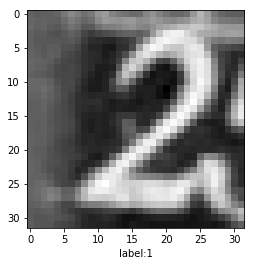

In [32]:
# 1 means is number region
def show_data(X,y):
    n = np.random.randint(len(y))
    plt.imshow(np.squeeze(X[n], axis=2),cmap='gray')
    plt.xlabel('label:'+ str(y[n].argmax()) )
show_data(X_train,y_train)

# Build model

In [3]:
from keras.models import *
from keras.layers import *

In [8]:
image_shape = X_train.shape[1:]
class_num = y_train.shape[-1]
model = Sequential()
model.add(BatchNormalization(input_shape=image_shape,name='bn1'))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name='block1_conv1'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same',name='block1_pool1'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',name='block2_conv1'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same',name='block2_pool1'))

model.add(Flatten(name='flat1'))

model.add(Dense(1024,activation='relu',name='fc1'))
model.add(Dropout(0.5,name='drop1'))
model.add(Dense(class_num,activation='softmax',name='pred'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bn1 (BatchNormalization)     (None, 32, 32, 1)         4         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 32)        320       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 32)        9248      
_________________________________________________________________
block1_pool1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 64)        18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 64)        36928     
_________________________________________________________________
block2_pool1 (MaxPooling2D)  (None, 8, 8, 64)          0         
__________

In [5]:
opt='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [6]:
epoch_num = 50
history = model.fit(X_train,y_train,epochs= epoch_num, validation_data=(X_test,y_test),verbose = 1,batch_size=256)

Train on 14588 samples, validate on 5091 samples
Epoch 1/50
14588/14588 [==============================] - 7s 472us/step - loss: 1.7394 - acc: 0.4039 - val_loss: 0.9817 - val_acc: 0.6936
Epoch 2/50
14588/14588 [==============================] - 3s 197us/step - loss: 0.7613 - acc: 0.7669 - val_loss: 0.6614 - val_acc: 0.8071
Epoch 3/50
14588/14588 [==============================] - 3s 195us/step - loss: 0.5452 - acc: 0.8364 - val_loss: 0.5265 - val_acc: 0.8421
Epoch 4/50
14588/14588 [==============================] - 3s 197us/step - loss: 0.4352 - acc: 0.8709 - val_loss: 0.4825 - val_acc: 0.8594
Epoch 5/50
14588/14588 [==============================] - 3s 196us/step - loss: 0.3513 - acc: 0.8907 - val_loss: 0.4880 - val_acc: 0.8635
Epoch 6/50
14588/14588 [==============================] - 3s 198us/step - loss: 0.2857 - acc: 0.9118 - val_loss: 0.4671 - val_acc: 0.8680
Epoch 7/50
14588/14588 [==============================] - 3s 199us/step - loss: 0.2313 - acc: 0.9289 - val_loss: 0.4580 - v

['grayscale', 'seaborn-notebook', 'fivethirtyeight', 'tableau-colorblind10', 'seaborn-dark-palette', 'seaborn-talk', 'bmh', 'seaborn-colorblind', 'classic', 'seaborn-deep', 'seaborn-muted', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-darkgrid', 'seaborn-dark', 'dark_background', 'ggplot', 'seaborn-poster', 'seaborn-paper', 'seaborn-whitegrid', '_classic_test', 'seaborn-ticks', 'seaborn-bright', 'seaborn', 'fast', 'seaborn-white']


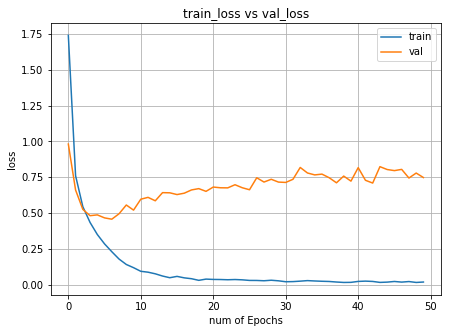

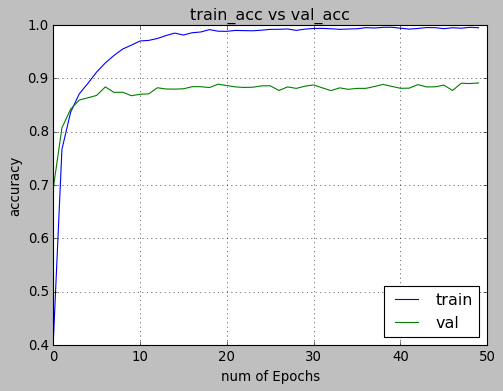

In [7]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [12]:
############################################
#model.save('digit_detector.h5')##########
#model = load_model('digit_detector.h5')##
############################################